This notebook contains:

- Implementation of the climate-constraint model => the script calculates the start and end of season from temperature and radiation time series

- Comparison of the modeled phenology (climate-constraint model) with observed phenology in FLUXNET site FI-Hyy (year 2005)

Adrià Descals - a.descals@creaf.uab.cat / CREAF - Centre de Recerca Ecològica i Aplicacions Forestals

In [126]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [127]:
# Load ERA5-Land data for the FLUXNET site FI-Hyy (year 2005)
ERA5 = pd.read_csv('https://raw.githubusercontent.com/adriadescals/sampleData/master/ERA5-Land_FI-Hyy_2005.csv')

T = ERA5.Temperature.to_numpy()
R = ERA5.Radiation.to_numpy()
DOY = ERA5.DoY.to_numpy()

Text(0, 0.5, 'Radiation (W m-2)')

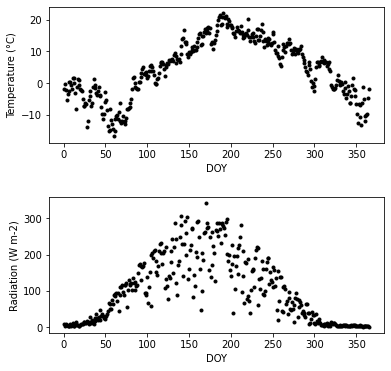

In [128]:
# Plot air temperature and incoming shortwave radiation
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 1, 1)
plt.plot(DOY, T,'.k')
plt.xlabel('DOY')
plt.ylabel('Temperature (°C)')

ax = fig.add_subplot(2, 1, 2)
plt.plot(DOY, R,'.k')
plt.xlabel('DOY')
plt.ylabel('Radiation (W m-2)')

In [129]:
# Define parameters of the climate-constraint model
Tthresh = 2.5
Rthresh = 27
C = 350

# Calculate the binary time series B(t)
B = (C/(T-Tthresh))+Rthresh-R;
B = B<0+0
B[T<Tthresh] = 0

Text(0, 0.5, 'B(t)')

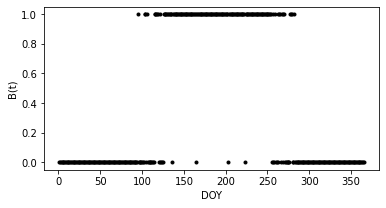

In [130]:
# Plot binary time series B(t) (0 = constrained; 1 = unconstrained)
fig = plt.figure(figsize=(6, 3))
plt.plot(DOY, B,'.k')
plt.xlabel('DOY')
plt.ylabel('B(t)')


In [131]:
# Define function for the Maximum Separation method (taken from https://github.com/adriadescals/MaximumSeparation_method)

def maximumSeparation(DOY,BIO,thresh,wsize):

  # Convert the original data into a binary time series
  bio_bin = BIO>thresh; 

  # Estimate the ratio of observations above the threshold before and after each day of the time series
  DOYdiff = np.array(DOY[wsize:-wsize],ndmin=2)
  D = np.zeros((1,DOYdiff.shape[1]), dtype=float)
  for idoy in np.nditer(DOYdiff.T):
    bin1 = bio_bin[np.logical_and(DOY>(idoy-wsize),DOY<idoy)]
    bin2 = bio_bin[np.logical_and(DOY<(idoy+wsize),DOY>idoy)]

    p1 = np.sum(bin1)/bin1.shape;
    p2 = np.sum(bin2)/bin2.shape;

    D[DOYdiff==idoy] = p1-p2

  # Find the Start of Season (minimum value of D) and the End of Season (maximum value in D)
  SoS = DOYdiff[0,np.argmin(D)]
  EoS = DOYdiff[0,np.argmax(D)]

  return SoS, EoS

In [132]:
# Define parameters Maximum Separation method
wsize = 60; # window size
thresh = 0.5  # threshold

# extract start and end of season (climate-constraint model)
SoSmodel, EoSmodel = maximumSeparation(DOY,B,thresh,wsize)

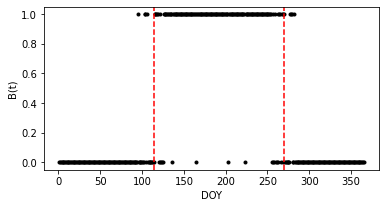

In [133]:
# plot binary time series B(t) and the modeled SoS and EoS (red dashed lines)
fig = plt.figure(figsize=(6, 3))
plt.plot(DOY, B,'.k')
plt.xlabel('DOY')
plt.ylabel('B(t)')
plt.axvline(x=SoSmodel, color='r',linestyle='dashed') 
plt.axvline(x=EoSmodel, color='r',linestyle='dashed') 

In [134]:
# COMPARE MODELED PHENOLOGY WITH OBSERVED PHENOLOGY 
# Load GPP for the FLUXNET site FI-Hyy 2005
FLX = pd.read_csv('https://raw.githubusercontent.com/adriadescals/sampleData/master/FLUXNET_GPP_FI-Hyy_2005.csv')

GPP = FLX.GPP.to_numpy()
DOYflx = FLX.DOY.to_numpy()

# extract start and end of season (GPP time series)
SoSgpp, EoSgpp = maximumSeparation(DOYflx,GPP,2,wsize)


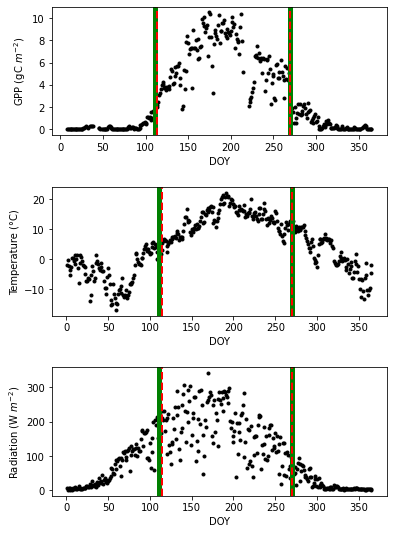

In [135]:
# PLOT RESULTS // red dashed lines = modeled phenology // green continuous lines = observed phenology
fig = plt.figure(figsize=(6, 9))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# GPP
ax = fig.add_subplot(3, 1, 1)
plt.plot(DOYflx, GPP,'.k')
plt.xlabel('DOY')
plt.ylabel('GPP (gC $m^{-2}$)')
plt.axvline(x=SoSgpp, color='g',linewidth=5)
plt.axvline(x=EoSgpp, color='g',linewidth=5)
plt.axvline(x=SoSmodel, color='r',linestyle='dashed',linewidth=2) 
plt.axvline(x=EoSmodel, color='r',linestyle='dashed',linewidth=2) 

# Temperature
ax = fig.add_subplot(3, 1, 2)
plt.plot(DOY, T,'.k')
plt.xlabel('DOY')
plt.ylabel('Temperature (°C)')
plt.axvline(x=SoSgpp, color='g',linewidth=5)
plt.axvline(x=EoSgpp, color='g',linewidth=5)
plt.axvline(x=SoSmodel, color='r',linestyle='dashed',linewidth=2) 
plt.axvline(x=EoSmodel, color='r',linestyle='dashed',linewidth=2) 

# Radiation
ax = fig.add_subplot(3, 1, 3)
plt.plot(DOY, R,'.k')
plt.xlabel('DOY')
plt.ylabel('Radiation (W $m^{-2}$)')
plt.axvline(x=SoSgpp, color='g',linewidth=5)
plt.axvline(x=EoSgpp, color='g',linewidth=5)
plt.axvline(x=SoSmodel, color='r',linestyle='dashed',linewidth=2) 
plt.axvline(x=EoSmodel, color='r',linestyle='dashed',linewidth=2) 